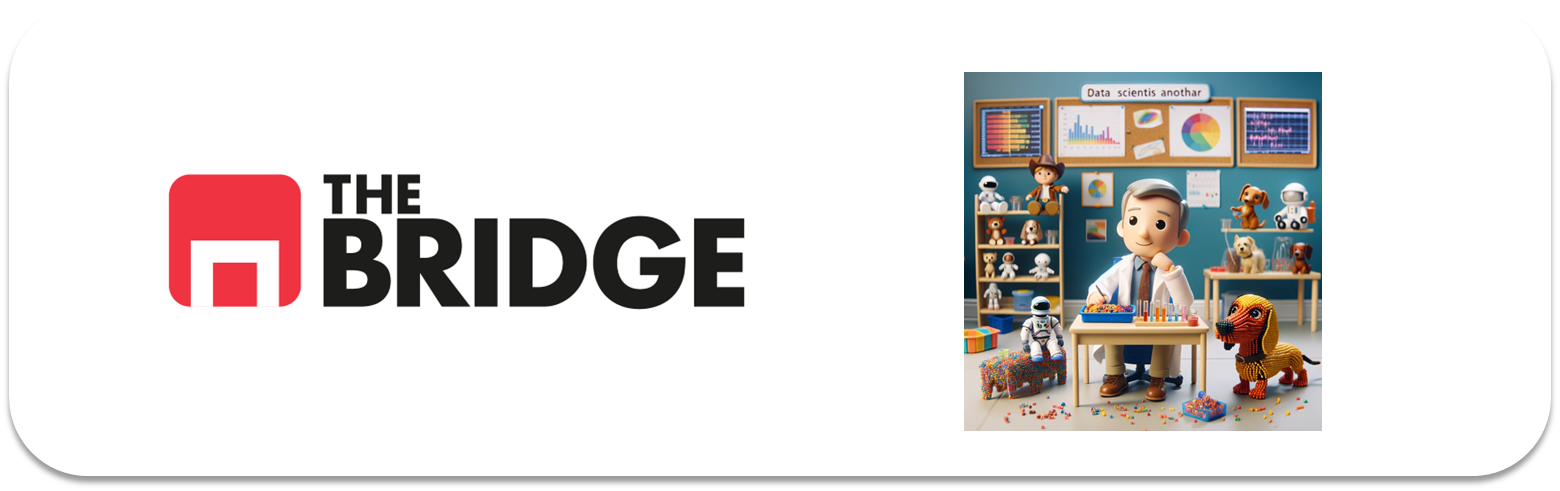

## PRACTICA OBLIGATORIA: ANÁLISIS UNIVARIANTE

* La práctica obligatoria de esta unidad consiste en hacer el análisis univariante completo de un dataset con el que acabarás muy familiarizado, el manifiesto de pasajeros del Titanic. Descarga este notebook en tu ordenador y trabaja en local. Ten en cuenta que tendrás que descar los directorios de imágenes y datos adicionales, si los hubiera.
* Recuerda que debes subirla a tu repositorio personal antes de la sesión en vivo para que puntúe adecuadamente.  
* Recuerda también que no es necesario que esté perfecta, sólo es necesario que se vea el esfuerzo. 
* Esta práctica se resolverá en la sesión en vivo correspondiente y la solución se publicará en el repo del curso. 

### Ejercicio 0

Importa los paquetes y módulos que necesites a lo largo del notebook. Te dejo una que vas a necesitar sí o sí

In [41]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import bootcampviztools 


### #1 Preparación


### #1.1


Carga en un dataframe los datos del titanic a partir de un dataset de seaborn. Para ello:

* ejecuta ```python sns.get_dataset_names()```
* localiza el nombre que puede ser el adecuado para el ejercicio
* Asigna la salida de ```python sns.load_dataset(<nombre_del_dataset)``` a una variable "df_titanic"

In [42]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'dowjones',
 'exercise',
 'flights',
 'fmri',
 'geyser',
 'glue',
 'healthexp',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'seaice',
 'taxis',
 'tips',
 'titanic']

In [43]:
df_titanic = sns.load_dataset("titanic")
df_titanic

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,2,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


### #1.2

Muestra una porción del dataset ("df_titanic") y su info general. ¿Hay nulos?

In [44]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [45]:
def hay_nulos(dataframe):
    return dataframe.isnull().values.any()

In [46]:
hay_nulos(df_titanic)

True

In [47]:
def columnas_con_nulos (dataframe):
    col_con_nulos = []
    for col in dataframe:
        if len(dataframe[dataframe[col].isna()]):
            col_con_nulos.append(col)
    if len(col_con_nulos) > 0:
        print(f"Las columnas {', '.join(col_con_nulos)} tienen nulos")
    else:
        print("No hay columnas con nulos")

In [48]:
columnas_con_nulos(df_titanic)

Las columnas age, embarked, deck, embark_town tienen nulos


### #1.3

Obtén el porcentaje de nulos y decide que hacer con las columnas con nulos y ejecútalo. Además deshazte de la columna "parch" que no la emplearemos.

In [49]:
def pct_nulos (dataframe):
    col_con_nulos = []
    pct_nulos = []
    for col in dataframe:
        pct_nulo = len(dataframe[dataframe[col].isna()])/len(dataframe) * 100
        if pct_nulo > 0:
            col_con_nulos.append(col)
            pct_nulos.append(pct_nulo)
    nulos = pd.Series(pct_nulos, index = col_con_nulos) # Creo una serie que voy a emplear en ejercicios posteriores
    return nulos

In [50]:
columnas_nulos = pct_nulos(df_titanic)
columnas_nulos

age            19.865320
embarked        0.224467
deck           77.216611
embark_town     0.224467
dtype: float64

In [51]:
df_titanic.drop(columns = "parch", inplace=True)
df_titanic

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000,S,Second,man,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,30.0000,S,First,woman,False,B,Southampton,yes,True
888,0,3,female,NaN,1,23.4500,S,Third,woman,False,NaN,Southampton,no,False
889,1,1,male,26.0,0,30.0000,C,First,man,True,C,Cherbourg,yes,True


In [52]:
df_backup = df_titanic.copy()

In [53]:
# Decidimos eliminar las columnas con más de un 20% de nulos --> Por lo que se eliminará la columna "deck"
df_titanic.drop(columns = columnas_nulos[columnas_nulos > 20].index.to_list(), inplace = True)
df_titanic

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,8.0500,S,Third,man,True,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000,S,Second,man,True,Southampton,no,True
887,1,1,female,19.0,0,30.0000,S,First,woman,False,Southampton,yes,True
888,0,3,female,NaN,1,23.4500,S,Third,woman,False,Southampton,no,False
889,1,1,male,26.0,0,30.0000,C,First,man,True,Cherbourg,yes,True


In [ ]:
# Completamos los nulos de la columna age con la edad media

In [54]:
df_titanic["age_fue_nulo"] = df_titanic["age"].isna()
media_age = round(df_titanic.age.mean(),0)
df_titanic.loc[df_titanic.age.isna(), "age"] = media_age
df_titanic

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_fue_nulo
0,0,3,male,22.0,1,7.2500,S,Third,man,True,Southampton,no,False,False
1,1,1,female,38.0,1,71.2833,C,First,woman,False,Cherbourg,yes,False,False
2,1,3,female,26.0,0,7.9250,S,Third,woman,False,Southampton,yes,True,False
3,1,1,female,35.0,1,53.1000,S,First,woman,False,Southampton,yes,False,False
4,0,3,male,35.0,0,8.0500,S,Third,man,True,Southampton,no,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000,S,Second,man,True,Southampton,no,True,False
887,1,1,female,19.0,0,30.0000,S,First,woman,False,Southampton,yes,True,False
888,0,3,female,30.0,1,23.4500,S,Third,woman,False,Southampton,no,False,True
889,1,1,male,26.0,0,30.0000,C,First,man,True,Cherbourg,yes,True,False


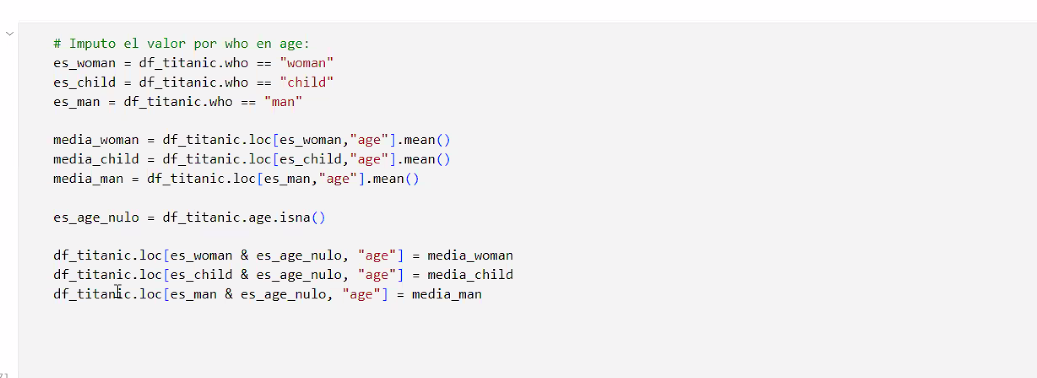

In [58]:
# La columna embarked es categórica, por lo que completaremos los valores nulos con la moda
print(df_titanic.embarked.value_counts())
df_titanic["embarked_fue_nulo"] = df_titanic["embarked"].isna()
moda_embarked = df_titanic.embarked.mode()[0]
df_titanic.loc[df_titanic.embarked.isna(), "embarked"] = moda_embarked
df_titanic

embarked
S    644
C    168
Q     77
Name: count, dtype: int64


,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_fue_nulo,embarked_fue_nulo
0,0,3,male,22.0,1,7.2500,S,Third,man,True,Southampton,no,False,False,False
1,1,1,female,38.0,1,71.2833,C,First,woman,False,Cherbourg,yes,False,False,False
2,1,3,female,26.0,0,7.9250,S,Third,woman,False,Southampton,yes,True,False,False
3,1,1,female,35.0,1,53.1000,S,First,woman,False,Southampton,yes,False,False,False
4,0,3,male,35.0,0,8.0500,S,Third,man,True,Southampton,no,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000,S,Second,man,True,Southampton,no,True,False,False
887,1,1,female,19.0,0,30.0000,S,First,woman,False,Southampton,yes,True,False,False
888,0,3,female,30.0,1,23.4500,S,Third,woman,False,Southampton,no,False,True,False
889,1,1,male,26.0,0,30.0000,C,First,man,True,Cherbourg,yes,True,False,False


In [59]:
df_titanic.embark_town.value_counts()

embark_town
Southampton    644
Cherbourg      168
Queenstown      77
Name: count, dtype: int64

In [60]:
# Vemos que embark_town es la ciudad de embarque, mientras que embarked es la abreviatura de estas ciudades.
# Completamos también con la moda
df_titanic["embark_town_fue_nulo"] = df_titanic["embark_town"].isna()
moda_embark_town = df_titanic.embark_town.mode()[0]
df_titanic.loc[df_titanic.embark_town.isna(), "embark_town"] = moda_embarked
df_titanic

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_fue_nulo,embarked_fue_nulo,embark_town_fue_nulo
0,0,3,male,22.0,1,7.2500,S,Third,man,True,Southampton,no,False,False,False,False
1,1,1,female,38.0,1,71.2833,C,First,woman,False,Cherbourg,yes,False,False,False,False
2,1,3,female,26.0,0,7.9250,S,Third,woman,False,Southampton,yes,True,False,False,False
3,1,1,female,35.0,1,53.1000,S,First,woman,False,Southampton,yes,False,False,False,False
4,0,3,male,35.0,0,8.0500,S,Third,man,True,Southampton,no,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000,S,Second,man,True,Southampton,no,True,False,False,False
887,1,1,female,19.0,0,30.0000,S,First,woman,False,Southampton,yes,True,False,False,False
888,0,3,female,30.0,1,23.4500,S,Third,woman,False,Southampton,no,False,True,False,False
889,1,1,male,26.0,0,30.0000,C,First,man,True,Cherbourg,yes,True,False,False,False


In [61]:
df_titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   survived              891 non-null    int64   
 1   pclass                891 non-null    int64   
 2   sex                   891 non-null    object  
 3   age                   891 non-null    float64 
 4   sibsp                 891 non-null    int64   
 5   fare                  891 non-null    float64 
 6   embarked              891 non-null    object  
 7   class                 891 non-null    category
 8   who                   891 non-null    object  
 9   adult_male            891 non-null    bool    
 10  embark_town           891 non-null    object  
 11  alive                 891 non-null    object  
 12  alone                 891 non-null    bool    
 13  age_fue_nulo          891 non-null    bool    
 14  embarked_fue_nulo     891 non-null    bool    
 15  embark

### #1.4
Sobre el dataset "limpio". Rellena la tabla de descripción (muy breve) de lo que es cada columna en función de su nombre y los valores. Para ayudarte:
* Se trata del dataset que reune lo más parecido a un manifiesto de supervivientes y fallecidos en el viaje.
* sibsp: Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)
* embarked: Es la incial de la letra de la ciudad donde embarcó la persona.



|Columna/Variable|Descripción|Tipo_de_Variable|Importancia inicial|Nota|
|-|-|-|-|-|
|survived|Se trata de la variable que indica si una persona sobrevivió o no, con valores 0 o 1.|||||
|pclass|Clase en las que viajaba cada pasajero en formato int (1,2,3).|||||
|sex|sexo del pasajero (man,woman)|||||
|age|edad del pasajero|||||
|sibsp|Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)|||||
|fare|precio que pagó el pasajero|||||
|embarked|inical de la ciudad en la que se embarcó|||||
|class|Clase en las que viajaba cada pasajero en formato str (first,second,third)|||||
|who|sexo del pasajero en formato str (man,woman)|||||
|adult_male|columna de variable booleana que indica si era un hombre adulto|||||
|embark_town|ciudad de embarque del pasajero|||||
|alive|variable booleana de si el pasajero sigue vivo|||||
|alone|variable booleana de si el pasajero viajaba solo|||||

### #1.5

Busca en internet las tres ciudades que visitó el Titanic antes de poner rumbo a su destino y llegar a alta mar. Cambia las iniciales por esos valores.

In [62]:
df_titanic["embarked"].replace({"S":"Southampton", "C":"Cherbourg","Q":"Queenstown "},inplace = True)

In [63]:
df_titanic

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,embark_town,alive,alone,age_fue_nulo,embarked_fue_nulo,embark_town_fue_nulo
0,0,3,male,22.0,1,7.2500,Southampton,Third,man,True,Southampton,no,False,False,False,False
1,1,1,female,38.0,1,71.2833,Cherbourg,First,woman,False,Cherbourg,yes,False,False,False,False
2,1,3,female,26.0,0,7.9250,Southampton,Third,woman,False,Southampton,yes,True,False,False,False
3,1,1,female,35.0,1,53.1000,Southampton,First,woman,False,Southampton,yes,False,False,False,False
4,0,3,male,35.0,0,8.0500,Southampton,Third,man,True,Southampton,no,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000,Southampton,Second,man,True,Southampton,no,True,False,False,False
887,1,1,female,19.0,0,30.0000,Southampton,First,woman,False,Southampton,yes,True,False,False,False
888,0,3,female,30.0,1,23.4500,Southampton,Third,woman,False,Southampton,no,False,True,False,False
889,1,1,male,26.0,0,30.0000,Cherbourg,First,man,True,Cherbourg,yes,True,False,False,False


In [65]:
df_titanic.drop(columns = "embark_town", inplace=True)
df_titanic

,survived,pclass,sex,age,sibsp,fare,embarked,class,who,adult_male,alive,alone,age_fue_nulo,embarked_fue_nulo,embark_town_fue_nulo
0,0,3,male,22.0,1,7.2500,Southampton,Third,man,True,no,False,False,False,False
1,1,1,female,38.0,1,71.2833,Cherbourg,First,woman,False,yes,False,False,False,False
2,1,3,female,26.0,0,7.9250,Southampton,Third,woman,False,yes,True,False,False,False
3,1,1,female,35.0,1,53.1000,Southampton,First,woman,False,yes,False,False,False,False
4,0,3,male,35.0,0,8.0500,Southampton,Third,man,True,no,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,13.0000,Southampton,Second,man,True,no,True,False,False,False
887,1,1,female,19.0,0,30.0000,Southampton,First,woman,False,yes,True,False,False,False
888,0,3,female,30.0,1,23.4500,Southampton,Third,woman,False,no,False,True,False,False
889,1,1,male,26.0,0,30.0000,Cherbourg,First,man,True,yes,True,False,False,False


### #2 Análisis

Sabiendo que el objetivo de nuestro análisis es hacer un estudio de la superviviencia y mortalidad en el viaje... Haz un análisis univariante completo y ordenado de las siguientes variables:
["survived","who","age","fare","class","embarked","alone"]
Nota: Si quieres añadir más, perfecto.

Separa el análisis en categóricas (incluyendo binarias) y numéricas. Muestra valores, gráficas y conclusiones/observaciones (2 o 3 por variable)

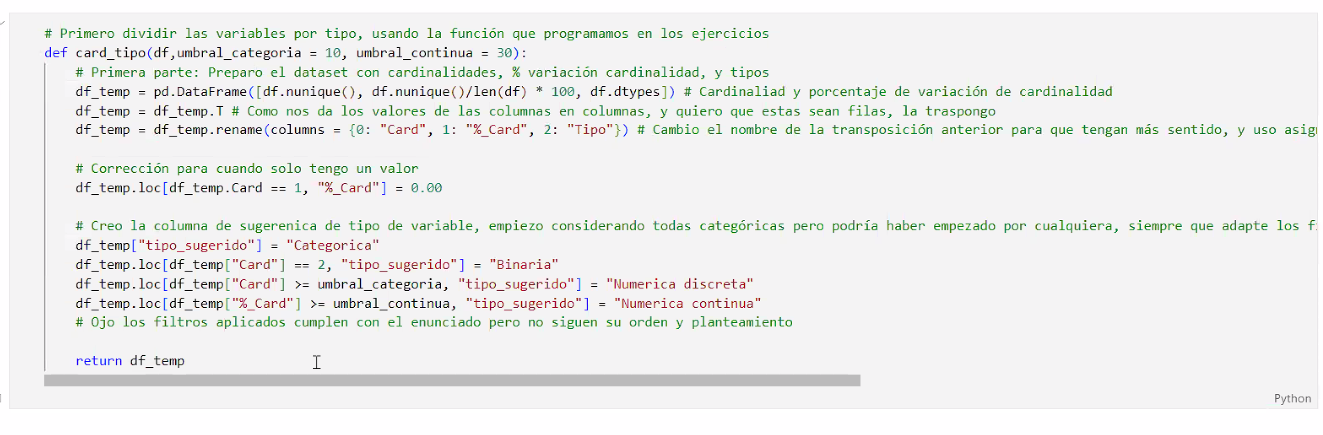

In [66]:
def cardinalidad(df_in, umbral_categorica, umbral_continua):
    columnas = []
    cardinalidades = []
    porcentajes_cardinalidad = []
    tipo_columna = []

    for columna in df_in.columns:
        cardinalidad = df_in[columna].nunique()
        porcentaje = (cardinalidad / len(df_in)) * 100

        if cardinalidad == 2:
            tipo = "Binaria"
        elif cardinalidad < umbral_categorica:
            tipo = "Categórica"
        else:
            if porcentaje == 100:
                tipo = "indice"
            elif porcentaje >= umbral_continua:
                tipo = "Numérica Continua"
            else:
                tipo = "Numérica Discreta"

        columnas.append(columna)
        cardinalidades.append(cardinalidad)
        porcentajes_cardinalidad.append(porcentaje)
        tipo_columna.append(tipo)

    df_resultado = pd.DataFrame({
        'Columna': columnas,
        'Cardinalidad': cardinalidades,
        'Porcentaje_Cardinalidad': porcentajes_cardinalidad,
        'Tipo_Columna': tipo_columna
    })

    return df_resultado


In [69]:
cardinalidad(df_titanic, 5,20)

,Columna,Cardinalidad,Porcentaje_Cardinalidad,Tipo_Columna
0,survived,2,0.224467,Binaria
1,pclass,3,0.336700,Categórica
2,sex,2,0.224467,Binaria
3,age,88,9.876543,Numérica Discreta
4,sibsp,7,0.785634,Numérica Discreta
5,fare,248,27.833895,Numérica Continua
6,embarked,3,0.336700,Categórica
7,class,3,0.336700,Categórica
8,who,3,0.336700,Categórica
9,adult_male,2,0.224467,Binaria



|Columna/Variable|Descripción|Tipo_de_Variable|Importancia inicial|Nota|
|-|-|-|-|-|
|survived|Se trata de la variable que indica si una persona sobrevivió o no, con valores 0 o 1.|Binaria||||
|pclass|Clase en las que viajaba cada pasajero en formato int (1,2,3).|Numérica discreta||Aunque solo tiene 3 valores posibles, la tratamos como numérica por si queremos hacer algún cálculo, aprovechando que está en int|
|sex|sexo del pasajero (man,woman)|Binaria||||
|age|edad del pasajero|Numérica Discreta||||
|sibsp|Es el numero de familiares que viajan con la persona indicada en el manifiesto (lista de pasajeros)|Numérica Discreta||||
|fare|precio que pagó el pasajero|Numérica Continua||||
|embarked|inical de la ciudad en la que se embarcó|Categórica||||
|class|Clase en las que viajaba cada pasajero en formato str (first,second,third)|Categórica||||
|who|sexo del pasajero en formato str (man,woman)|Categórica||||
|adult_male|columna de variable booleana que indica si era un hombre adulto|Binaria||||
|alive|variable booleana de si el pasajero sigue vivo|Binaria||||
|alone|variable booleana de si el pasajero viajaba solo|Binaria||||

### #2.1 Categóricas

In [94]:
categoricas = ["alive", "who", "class", "embarked", "alone"]

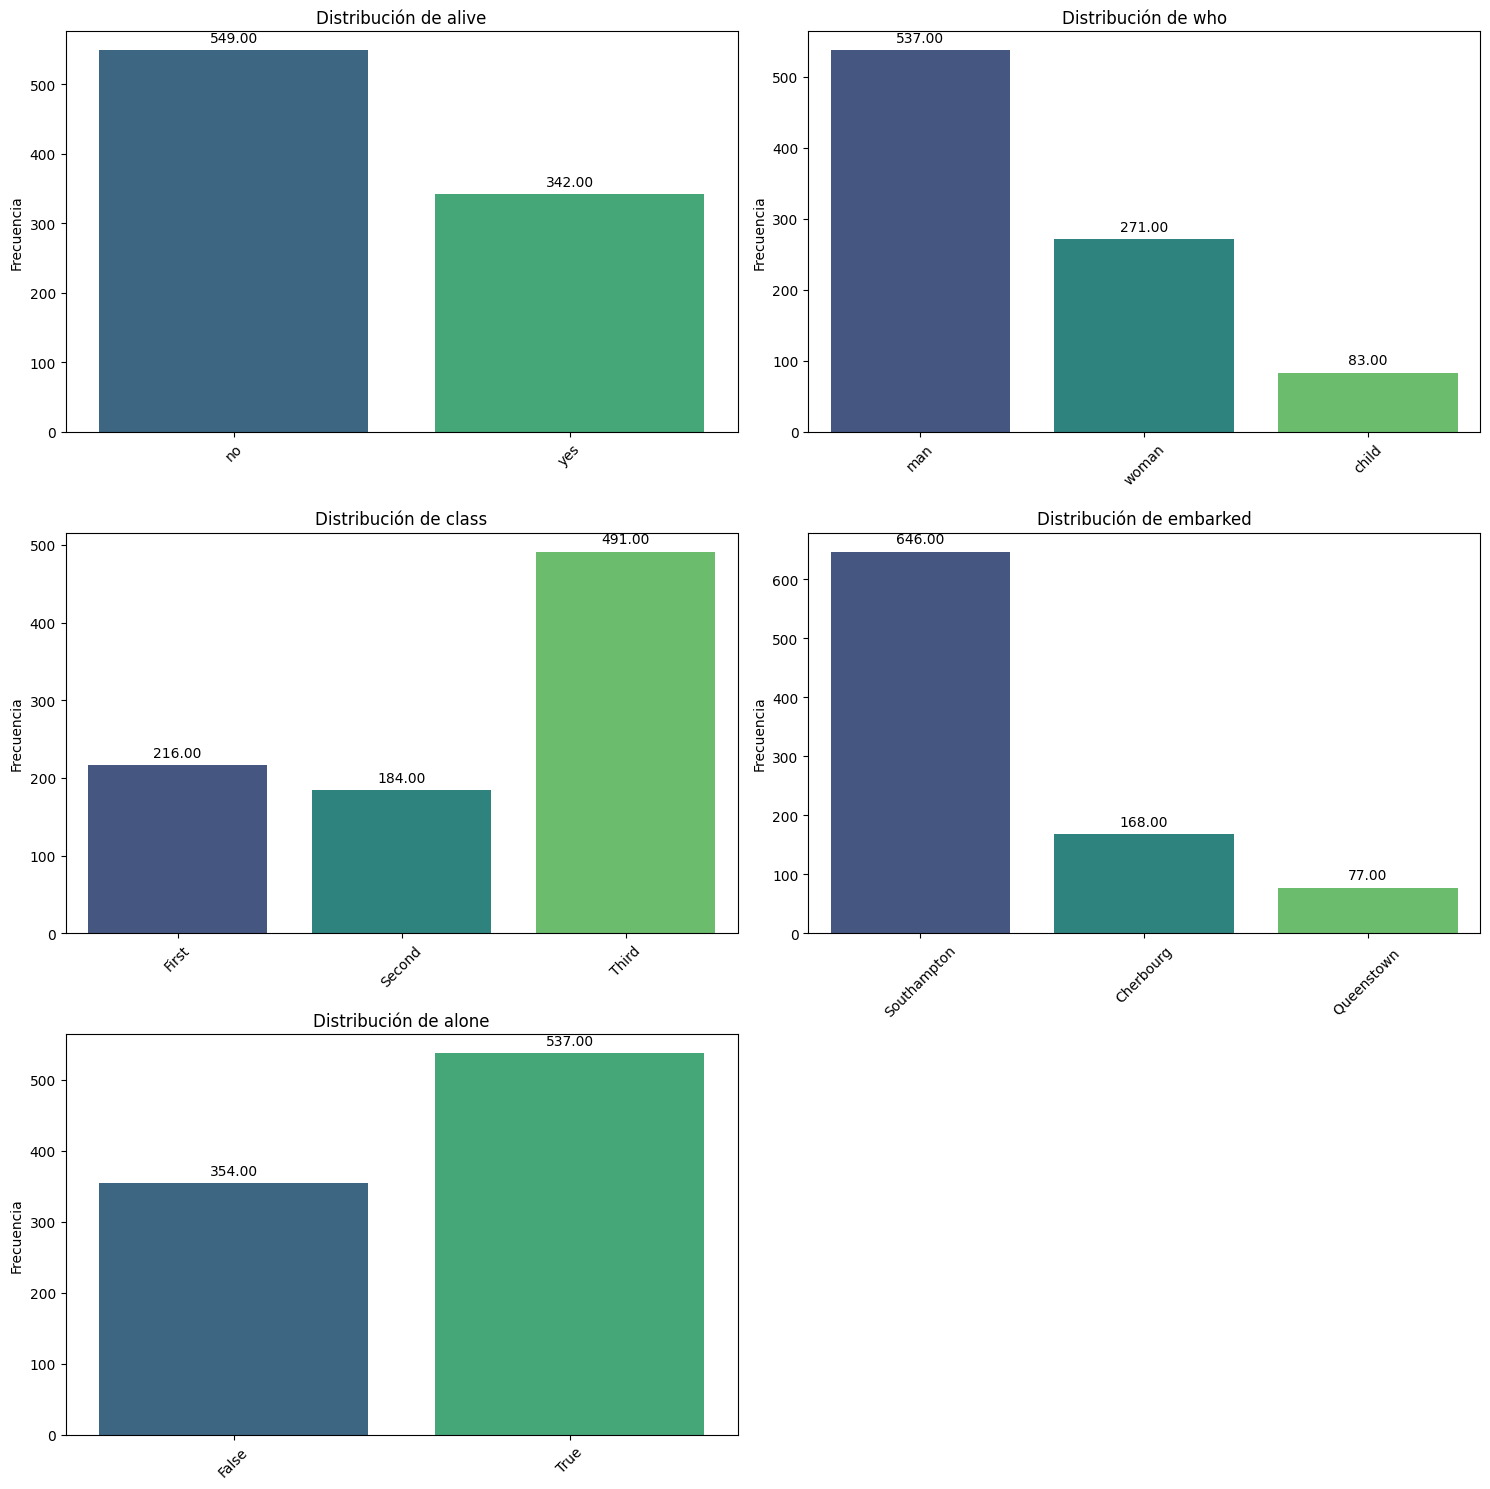

In [95]:
bootcampviztools.pinta_distribucion_categoricas(df_titanic, categoricas, mostrar_valores = True)

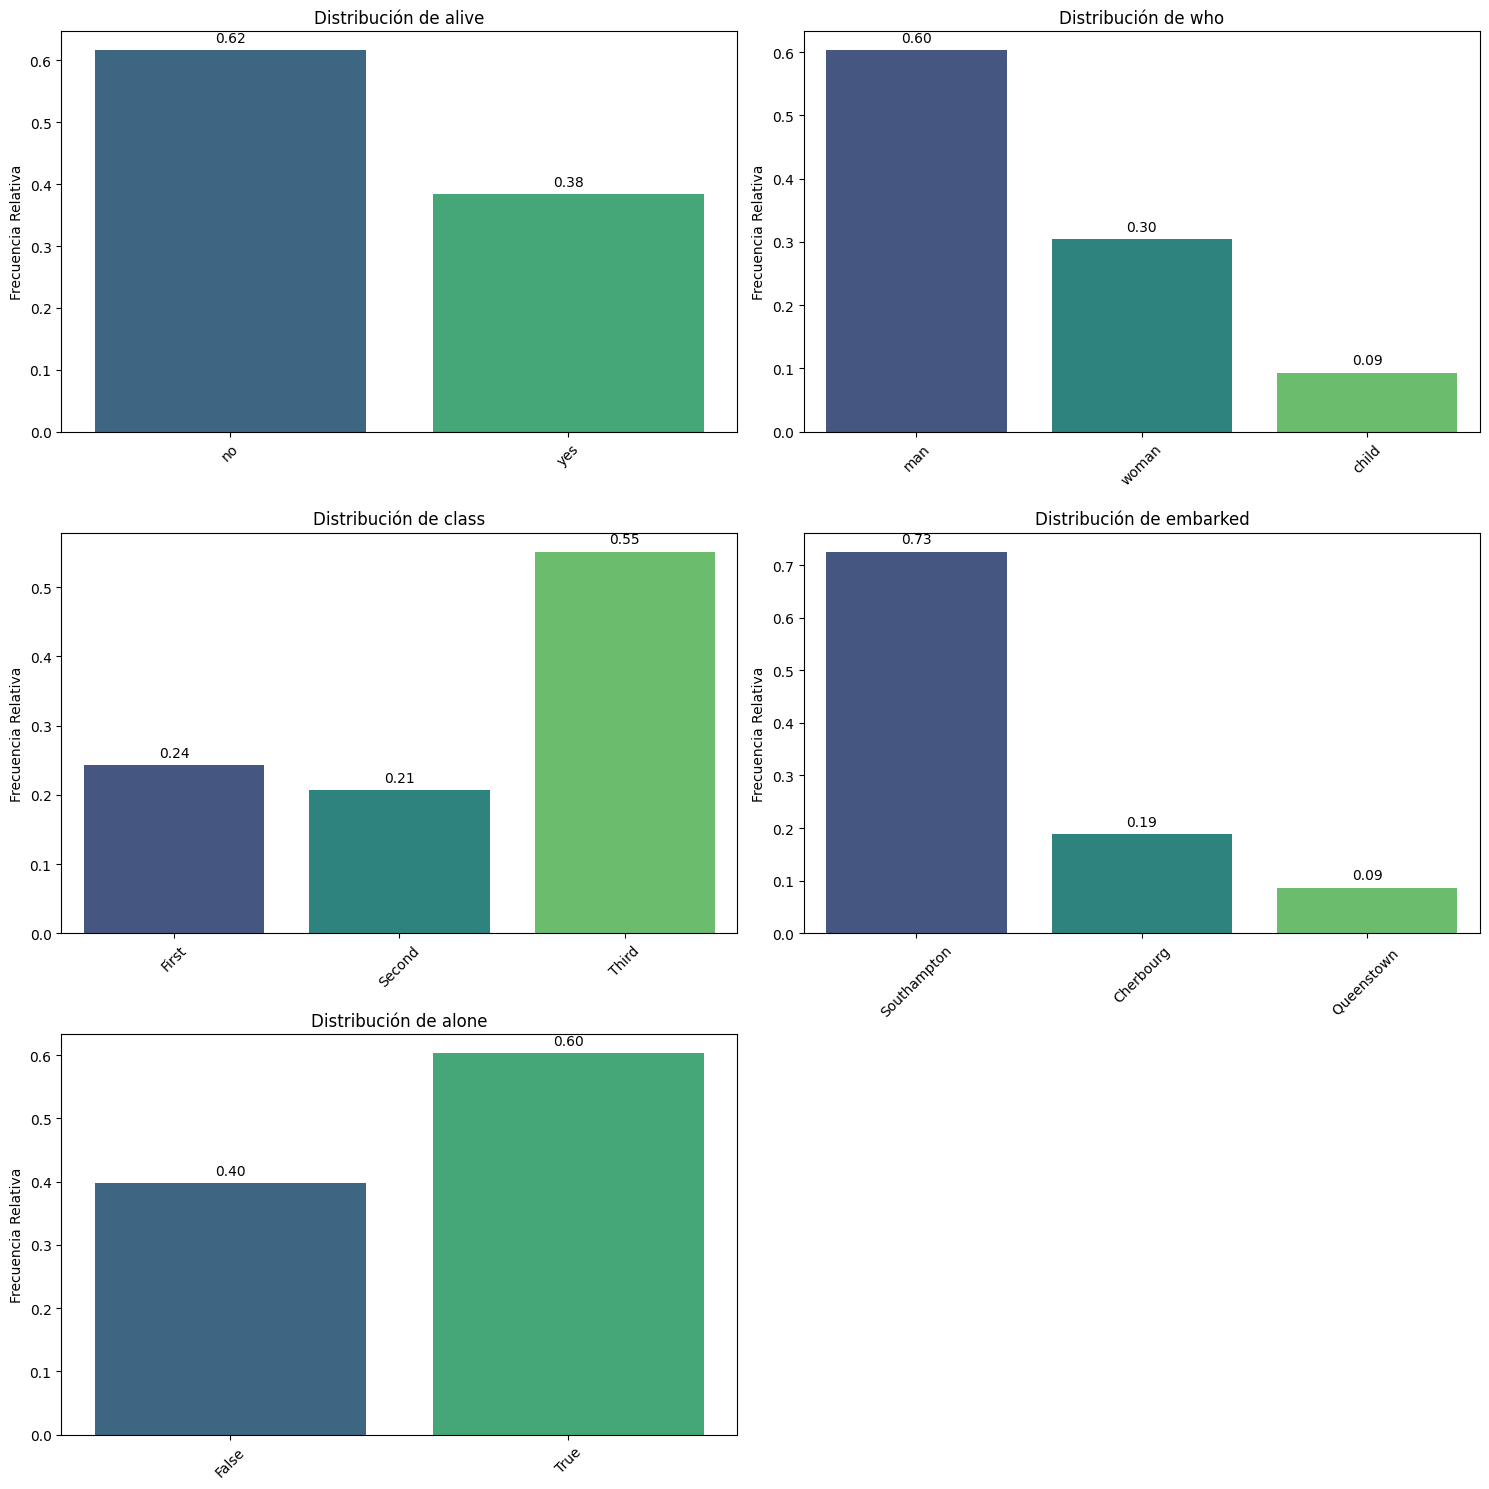

In [96]:
bootcampviztools.pinta_distribucion_categoricas(df_titanic, categoricas, relativa= True, mostrar_valores = True)

#### Survived

In [74]:
# Frecuencias con numeros
print("Moda:",df_titanic.survived.mode())
print("Frecuencias Absolutas:\n", df_titanic.survived.value_counts())
print("Frecuencias Relativas: \n", df_titanic.survived.value_counts(normalize = True) * 100)

Moda: 0    0
Name: survived, dtype: int64
Frecuencias Absolutas:
 survived
0    549
1    342
Name: count, dtype: int64
Frecuencias Relativas: 
 survived
0    61.616162
1    38.383838
Name: proportion, dtype: float64


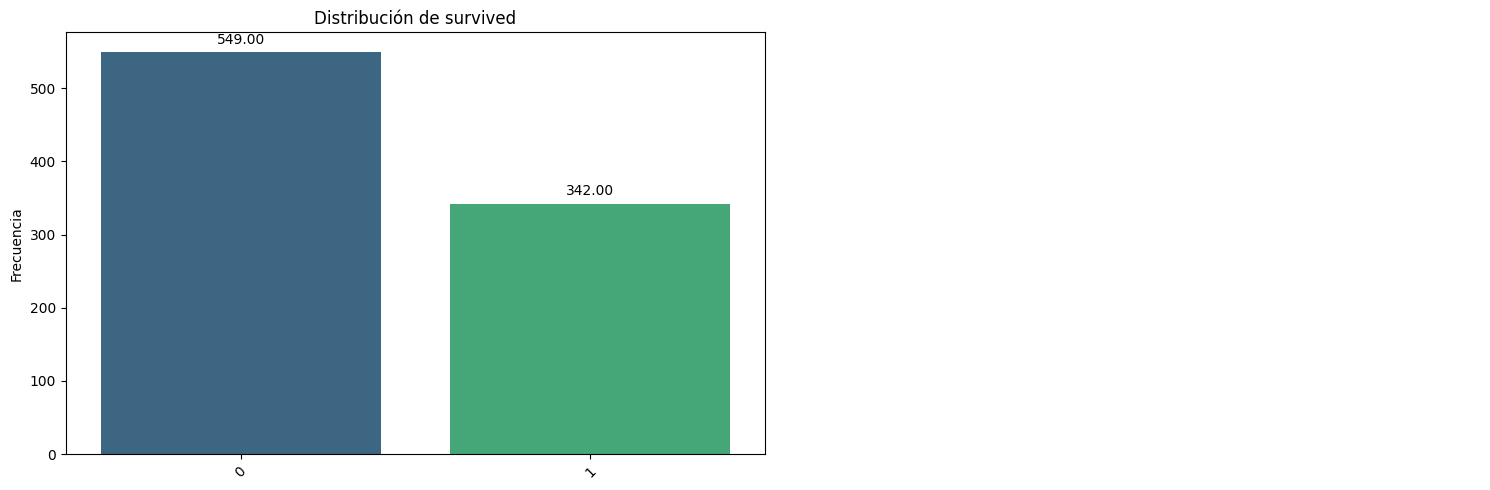

In [72]:
bootcampviztools.pinta_distribucion_categoricas(df_titanic,["survived"], mostrar_valores= True)

### Who

Moda: 0    man
Name: who, dtype: object
Frecuencias Absolutas:
 who
man      537
woman    271
child     83
Name: count, dtype: int64
Frecuencias Relativas: 
 who
man      60.269360
woman    30.415264
child     9.315376
Name: proportion, dtype: float64


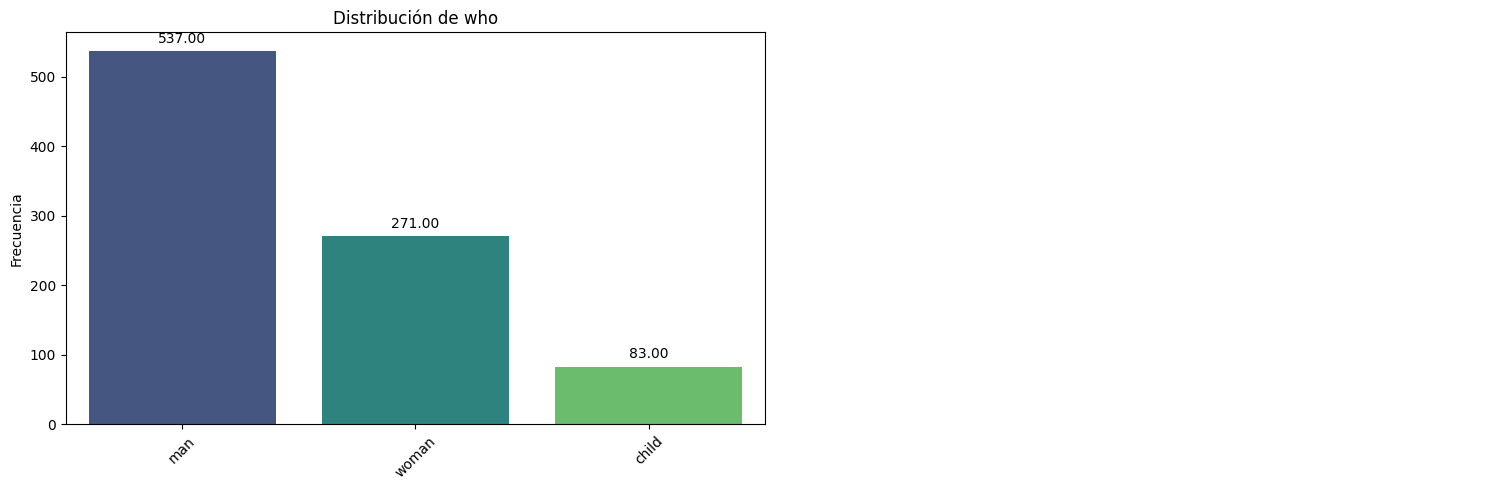

In [77]:
print("Moda:",df_titanic.who.mode())
print("Frecuencias Absolutas:\n", df_titanic.who.value_counts())
print("Frecuencias Relativas: \n", df_titanic.who.value_counts(normalize = True) * 100)
bootcampviztools.pinta_distribucion_categoricas(df_titanic,["who"], mostrar_valores= True)

Moda: 0    Third
Name: class, dtype: category
Categories (3, object): ['First', 'Second', 'Third']
Frecuencias Absolutas:
 class
Third     491
First     216
Second    184
Name: count, dtype: int64
Frecuencias Relativas: 
 class
Third     55.106622
First     24.242424
Second    20.650954
Name: proportion, dtype: float64


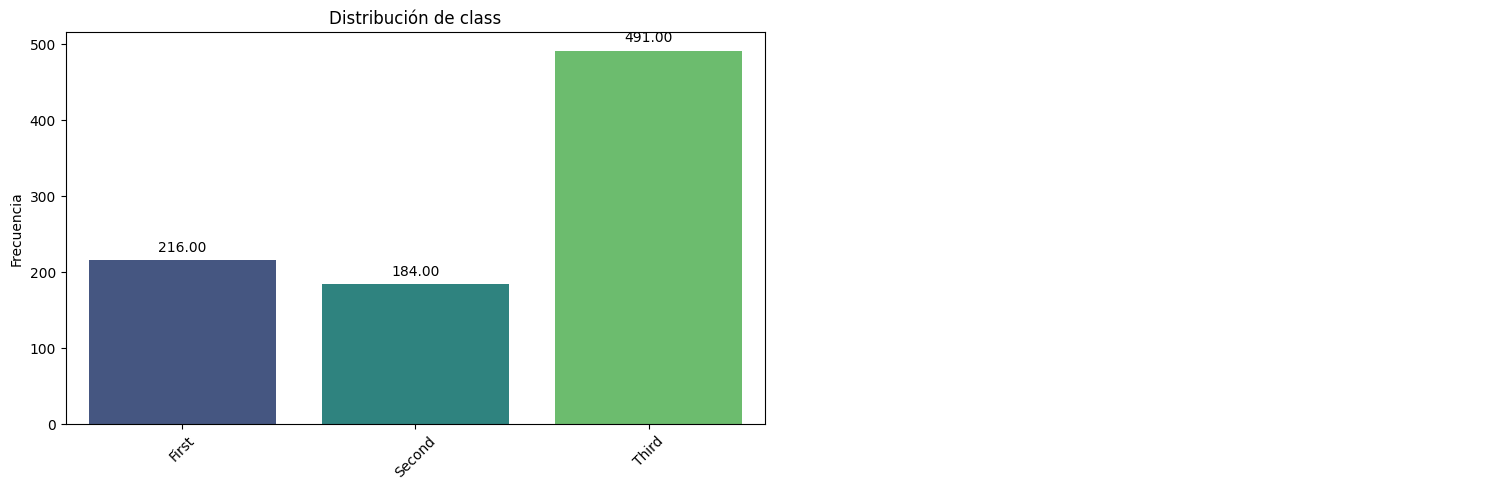

In [79]:
print("Moda:",df_titanic["class"].mode())
print("Frecuencias Absolutas:\n", df_titanic["class"].value_counts())
print("Frecuencias Relativas: \n", df_titanic["class"].value_counts(normalize = True) * 100)
bootcampviztools.pinta_distribucion_categoricas(df_titanic,["class"], mostrar_valores= True)

Moda: 0    Southampton
Name: embarked, dtype: object
Frecuencias Absolutas:
 embarked
Southampton    646
Cherbourg      168
Queenstown      77
Name: count, dtype: int64
Frecuencias Relativas: 
 embarked
Southampton    72.502806
Cherbourg      18.855219
Queenstown      8.641975
Name: proportion, dtype: float64


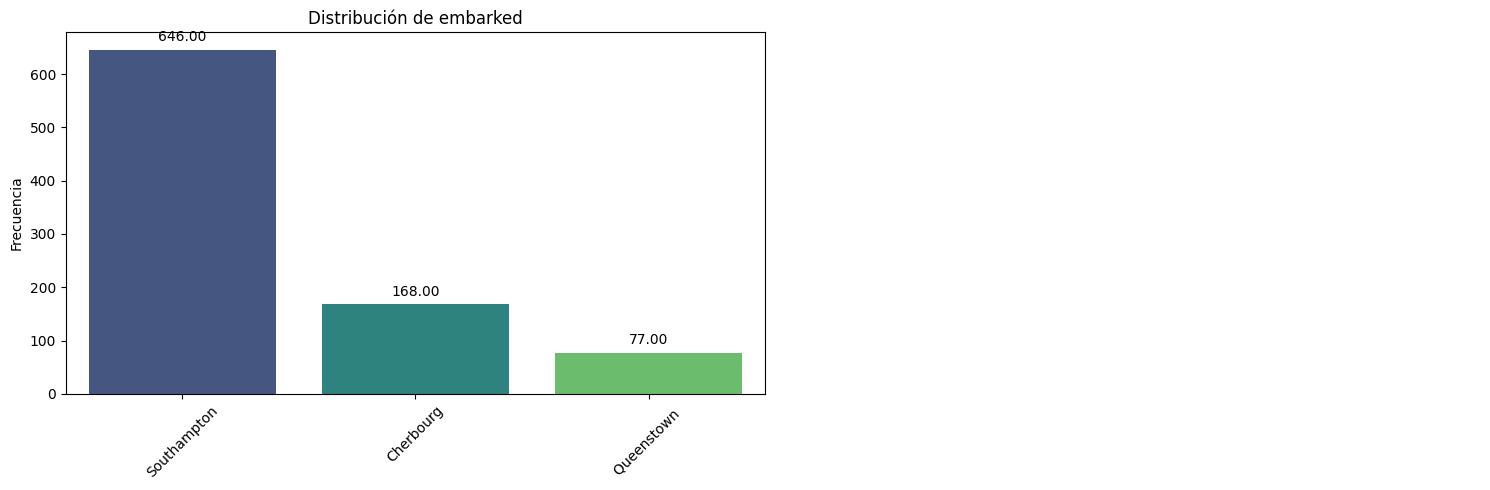

In [80]:
print("Moda:",df_titanic["embarked"].mode())
print("Frecuencias Absolutas:\n", df_titanic["embarked"].value_counts())
print("Frecuencias Relativas: \n", df_titanic["embarked"].value_counts(normalize = True) * 100)
bootcampviztools.pinta_distribucion_categoricas(df_titanic,["embarked"], mostrar_valores= True)

Moda: 0    True
Name: alone, dtype: bool
Frecuencias Absolutas:
 alone
True     537
False    354
Name: count, dtype: int64
Frecuencias Relativas: 
 alone
True     60.26936
False    39.73064
Name: proportion, dtype: float64


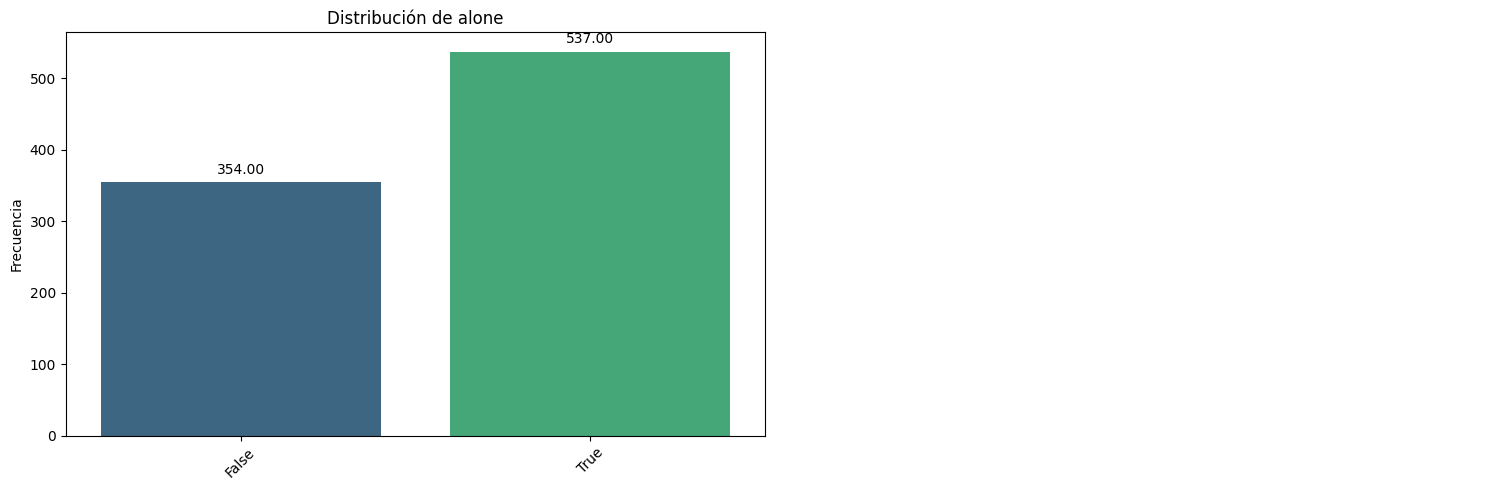

In [81]:
print("Moda:",df_titanic["alone"].mode())
print("Frecuencias Absolutas:\n", df_titanic["alone"].value_counts())
print("Frecuencias Relativas: \n", df_titanic["alone"].value_counts(normalize = True) * 100)
bootcampviztools.pinta_distribucion_categoricas(df_titanic,["alone"], mostrar_valores= True)

### #2.2 Numéricas

In [82]:
df_titanic.describe()

,survived,pclass,age,sibsp,fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.758889,0.523008,32.204208
std,0.486592,0.836071,13.002570,1.102743,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000
25%,0.000000,2.000000,22.000000,0.000000,7.910400
50%,0.000000,3.000000,30.000000,0.000000,14.454200
75%,1.000000,3.000000,35.000000,1.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,512.329200


In [83]:
def get_CV(df, columna):
    columna = [columna] if type(columna) == str else columna
    return df[columna].describe().T["std"]/df[columna].describe().T["mean"] * 100

In [84]:
get_CV(df_titanic,"age")

age    43.693063
dtype: float64

(2,)


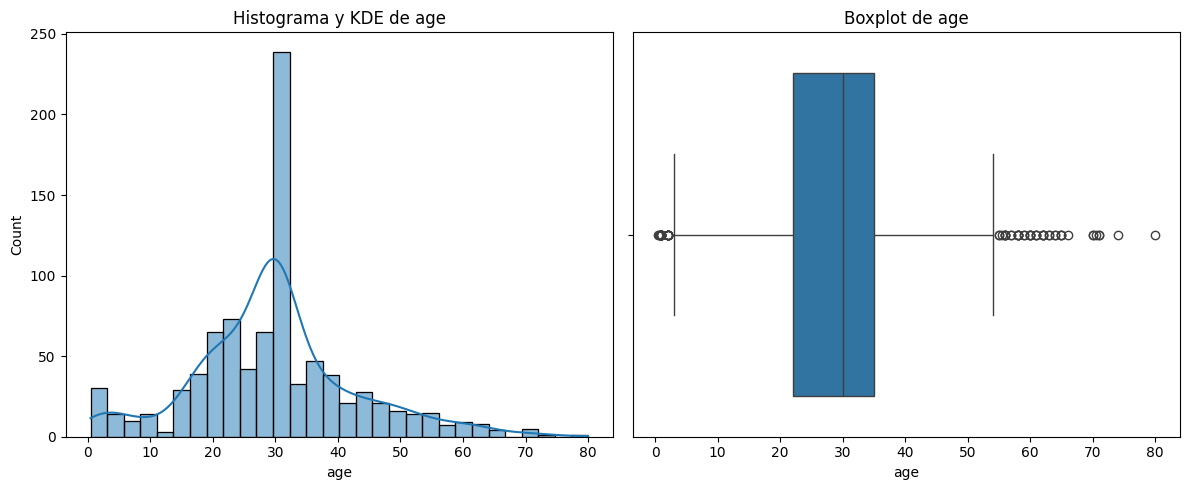

In [86]:
bootcampviztools.plot_combined_graphs(df_titanic,["age"])

In [88]:
get_CV(df_titanic,"fare")

fare    154.307253
dtype: float64

(2,)


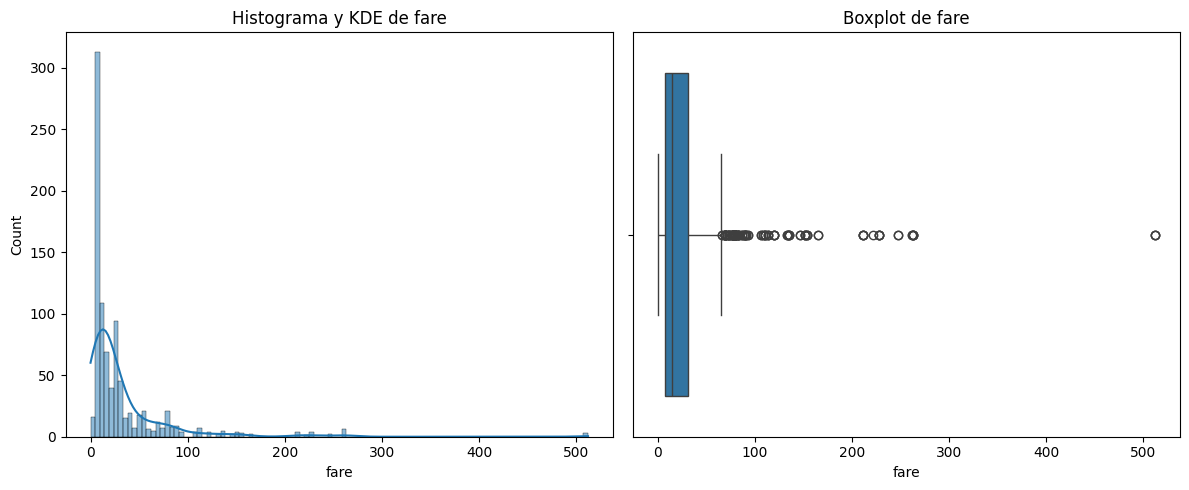

In [89]:
bootcampviztools.plot_combined_graphs(df_titanic,["fare"])